# Example usage

To use `spenv` in a project:

In [1]:
import spenv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(spenv.__version__)

0.1.0


## Data
The dataset used in this example is the `nyse` data from the `astsa` R package, scraped from the `astsadata` [Python module](https://github.com/evorition/astsadata/blob/main/astsadata/data/nyse.csv).

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/evorition/astsadata/main/astsadata/data/nyse.csv")

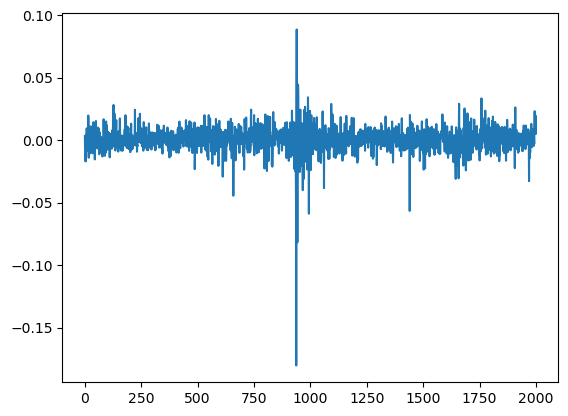

In [3]:
plt.plot(data.value)
plt.show()

## Spectral Analysis

These functions can be used for spectral estimation of univariate or multivariate time series.

### Tapered time series
`spec_taper` applies taper smoothing to a time series.

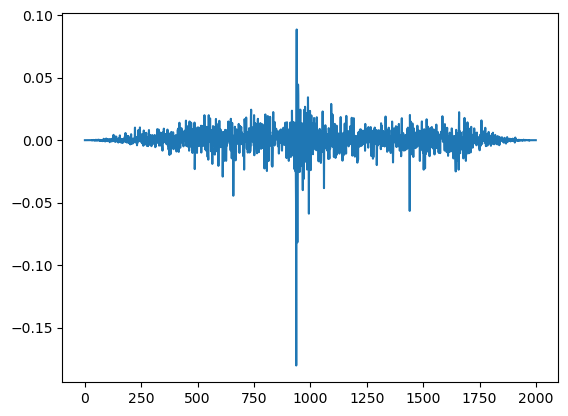

In [4]:
plt.plot(spenv.spec_taper(data.value, p=0.25))
plt.show()

### Multivariate Periodogram

In this example, the $(x, |x|, x^2)$ set is used to generate a matrix for multivariate spectral estimation.

In [5]:
# reshape to a 2D array
vec = data['value'].values.reshape((-1,1))

# generate matrix
mat = np.concatenate([vec, np.abs(vec), vec**2], axis=1)

# estimate
pgram = spenv.mvspec(mat)

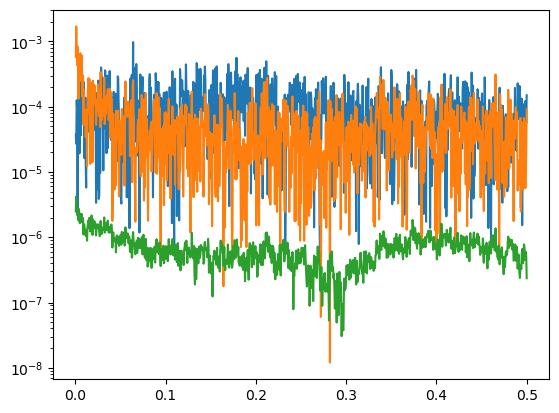

In [6]:
plt.plot(pgram['freq'], pgram['spec'][:,0])
plt.plot(pgram['freq'], pgram['spec'][:,1])
plt.plot(pgram['freq'], pgram['spec'][:,2])
plt.yscale('log')
plt.show()

## Spectral Envelope

The `specenv` function computes the spectral envelope for the time series provided. The `spec_opt` automatically smoothes a time series based on the approach presented in [Time Series Analysis and Its Applications with R Examples](https://www.stat.pitt.edu/stoffer/tsa4/).

In [7]:
envelope = pd.DataFrame(spenv.specenv(mat), columns= ['freq', 'specenv', 'b1', 'b2', 'b3'])
envelope.head(10)
# the first and second columns represent the frequencies and envelope estimated
# while the remaining show the coefficients

,freq,specenv,b1,b2,b3
0,0.0005,0.011437,-0.068884,-0.633744,0.770470
1,0.0010,0.026382,0.004831,-0.233153,0.972428
2,0.0015,0.016049,-0.023791,0.270289,-0.962485
3,0.0020,0.006597,0.043528,-0.209931,0.976747
4,0.0025,0.015982,-0.044775,-0.391717,0.918996
5,0.0030,0.004889,-0.081479,0.398915,-0.913361
6,0.0035,0.003250,-0.054930,0.156253,0.986189
7,0.0040,0.002765,0.278932,0.116058,-0.953272
8,0.0045,0.000000,-0.130564,-0.091072,0.987248
9,0.0050,0.004344,-0.096177,-0.152392,-0.983629


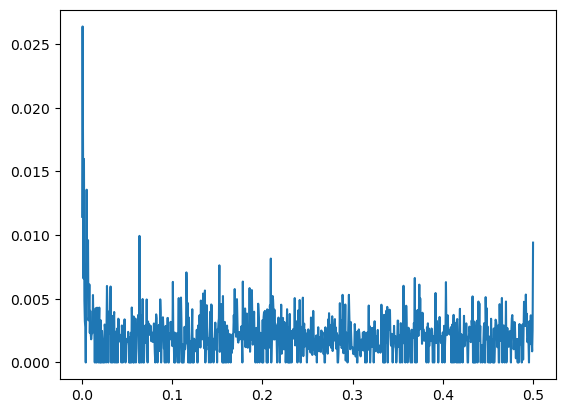

In [30]:
# plot the spectral envelope
plt.plot(envelope['freq'], envelope['specenv'])
plt.show()

In [26]:
# time series smoothing
smoothed = spenv.spec_opt(vec, np.abs, np.square)
# create a dataframe from original and smoothed
result = pd.DataFrame({'original': vec.flatten(), 'smoothed': smoothed})

<function matplotlib.pyplot.show(close=None, block=None)>

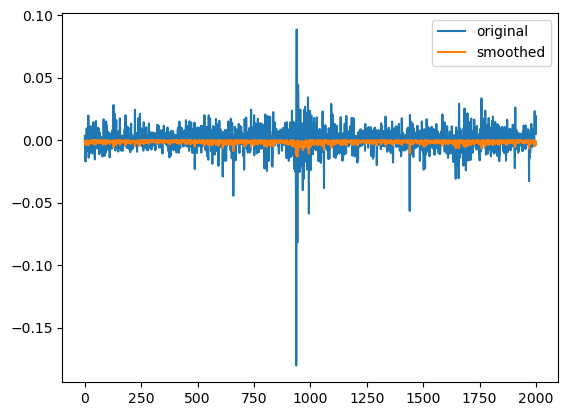

In [27]:
for col in result.columns:
    result[col].plot(legend=True)
plt.show